In [9]:
import pandas as pd

from alphax.dataset import DATASET_DIR

train_data = pd.read_csv(f"{DATASET_DIR}/candle/5m/DOGE_USDT:USDT_2024-01-01 00:00:00_2024-07-01 00:00:00.csv")

# 删除不需要的列
train_data.drop(columns=["high", "low", "open",], inplace=True)
train_data.head()

,timestamp,close,volume
0,2023-12-31 16:00:00,0.09018,3583000.0
1,2023-12-31 16:05:00,0.09023,1365000.0
2,2023-12-31 16:10:00,0.09044,3991000.0
3,2023-12-31 16:15:00,0.09043,4330000.0
4,2023-12-31 16:20:00,0.09046,1812000.0


In [19]:
# 构建涨幅率，涨幅率 = (后一行的close - 当前一行close) / 当前一行的close
train_data['price_rate'] =  (train_data["close"].shift(-1) - train_data["close"]) / train_data["close"]
train_data['target'] = train_data['price_rate'] > 0.002
# 统计一下target为true的数量
train_data.head()


,timestamp,close,volume,price_rate,price_r,target,macd_hist,macd_hist_slope
33,2023-12-31 18:45:00,0.09053,1349000.0,-0.000221,NaN,False,-0.689609,NaN
34,2023-12-31 18:50:00,0.09051,768000.0,0.000331,-0.430689,False,-1.048342,NaN
35,2023-12-31 18:55:00,0.09054,1353000.0,0.000221,0.761719,False,-1.060623,NaN
36,2023-12-31 19:00:00,0.09056,1651000.0,0.000110,0.220251,False,-0.916509,-0.069298
37,2023-12-31 19:05:00,0.09057,695000.0,-0.000994,-0.579043,False,-0.743655,0.105818


In [20]:
from talib import MACD

train_data['VMA_5'] = train_data['volume'].rolling(window=5).mean()
train_data['Volume_ROC'] = train_data['volume'].pct_change(periods=1)
train_data.dropna(inplace=True)

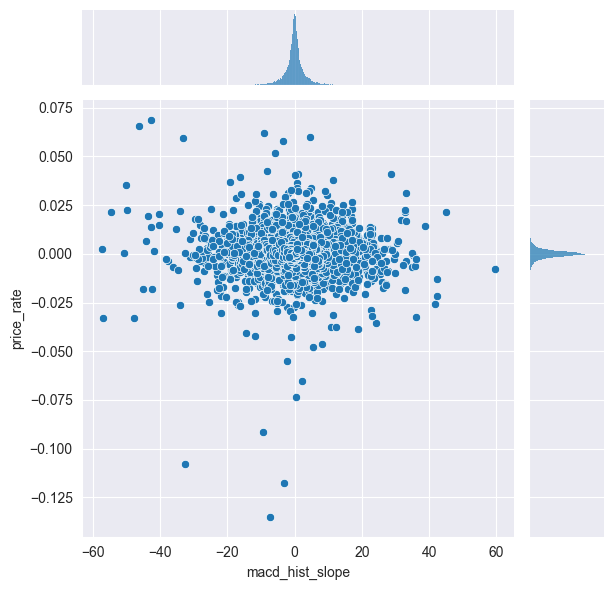

In [13]:
# 用plot 展示一下 price_diff_rate 在 macd_hist_slope 下的分布
import matplotlib.pyplot as plt
import seaborn as sns
# 求一个数字的绝对值

# filtered_df = train_data[train_data['price_rate']>0.02 ]
# filtered_df = train_data[train_data['macd_hist_slope']]
filtered_df = train_data
sns.jointplot(x='macd_hist_slope', y='price_rate', data=filtered_df, kind='scatter')
plt.show()


从结果来看 macd的斜率变化和价格的涨幅率相关性不大。在斜率很低的时候，价格也可能会有很大的涨幅。

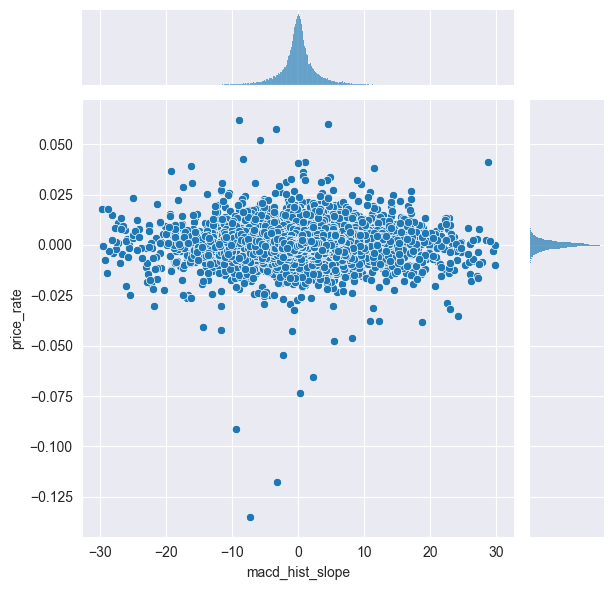

In [14]:
filtered_df = train_data[train_data['macd_hist_slope'] < 30]
filtered_df = filtered_df[filtered_df['macd_hist_slope'] > -30]
sns.jointplot(x='macd_hist_slope', y='price_rate', data=filtered_df, kind='scatter')
plt.show()

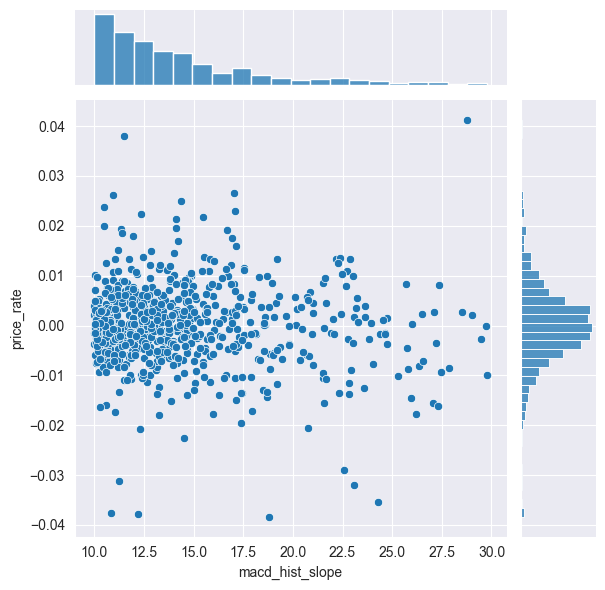

In [15]:
# 分析一下macd_hist_slope>10 小于30时，价格的涨幅率分布
filtered_df = train_data[train_data['macd_hist_slope'] > 10]
filtered_df = filtered_df[filtered_df['macd_hist_slope'] < 30]
sns.jointplot(x='macd_hist_slope', y='price_rate', data=filtered_df, kind='scatter')
plt.show()

再加一个特征，看macd_hist 是否是连续放量上涨